# 📊📉Analyse exploratoire des données 

In [ ]:
import os
import pandas as pd
import numpy as np  
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

from pathlib import Path

sns.set_theme(style="whitegrid", palette="muted")
from matplotlib import rcParams
palette = sns.color_palette("pastel")



import warnings
warnings.filterwarnings("ignore")

## I - Importation des données

In [103]:
BASE_DIR = Path().resolve().parent
DATA_DIR = BASE_DIR / 'Donnees'

print(f"BASE_DIR: {BASE_DIR}")
print(f"DATA_DIR: {DATA_DIR}")

BASE_DIR: C:\Users\NAZIFOU\Car-price
DATA_DIR: C:\Users\NAZIFOU\Car-price\Donnees


In [197]:
df = pd.read_csv(DATA_DIR / 'vehicules.csv')
df.head()

,Modèle,Prix,Transmission,Version,Kilométrage,Carburant,Puissance,Évaluations,Vendeur,Nom de la Voiture,Date
0,audi,€ 74 999,Boîte automatique,55 TFSI Quattro Tiptronic S-Line INDIVIDUAL!,34 000 km,Essence,250 kW (340 CH),121,Kristof D'herde • BE-9300 Aalst,Audi Q855 TFSI Quattro Tiptronic S-Line INDIVI...,01/2021
1,audi,€ 118 900,Boîte automatique,60 Hybride 49 CO2 BlackPack B&O 23' Leather,10 km,Electrique/Essence,340 kW (462 CH),107,Frederik Rik Maxime Jorn Hendrik • BE-8710 Wie...,Audi Q860 Hybride 49 CO2 BlackPack B&O 23' Lea...,01/2024
2,audi,€ 118 900,Boîte automatique,60 Hybr 49gr Sline BlackPack B&O Leather 23',10 km,Electrique/Essence,340 kW (462 CH),107,Frederik Rik Maxime Jorn Hendrik • BE-8710 Wie...,Audi Q860 Hybr 49gr Sline BlackPack B&O Leathe...,01/2024
3,audi,€ 59 995,Boîte automatique,50 TDi S-Line Quattro Tiptronic,95 702 km,Diesel,210 kW (286 CH),75,Mhr Jannick Lazoore • BE-8620 Nieuwpoort,Audi Q850 TDi S-Line Quattro Tiptronic,04/2019
4,audi,€ 76 900,Boîte automatique,50 TDI quattro tiptronic competition plus! Full !,19 000 km,Diesel,210 kW (286 CH),252,Sam B • BE-3970 Leopoldsburg,Audi Q850 TDI quattro tiptronic competition pl...,09/2022


In [105]:
df.shape

(2680, 11)

2680 lignes et 11 colonnes 

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 0 to 2679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Modèle             2680 non-null   object
 1   Prix               2680 non-null   object
 2   Transmission       2680 non-null   object
 3   Version            2660 non-null   object
 4   Kilométrage        2680 non-null   object
 5   Carburant          2680 non-null   object
 6   Puissance          2680 non-null   object
 7   Évaluations        2680 non-null   object
 8   Vendeur            2680 non-null   object
 9   Nom de la Voiture  2680 non-null   object
 10  Date               2680 non-null   object
dtypes: object(11)
memory usage: 230.4+ KB


Structure générale
- Nombre d’observations (lignes) : 2 680
- Nombre de colonnes (variables) : 11
- Index : de 0 à 2679 (RangeIndex par défaut)

In [107]:
#df.columns = df.columns.str.lower()
#df.columns

In [108]:
df.isnull().sum().to_frame().T

,Modèle,Prix,Transmission,Version,Kilométrage,Carburant,Puissance,Évaluations,Vendeur,Nom de la Voiture,Date
0,0,0,0,20,0,0,0,0,0,0,0


Toutes les colonnes sauf Version n’ont aucune valeur "0" (ce qui est généralement une bonne chose).

Version a 20 valeurs "0" → probablement des valeurs manquantes ou non renseignées.

In [110]:
nbre_Na = df.isnull().sum().sum()
print(f"Nombre de valeurs manquantes : {nbre_Na}")

Nombre de valeurs manquantes : 20


Nous allons donc traiter ces valeurs manquants par la suppression des ces derniers vu qu'ils representent que 0.7 % des données à notre disposition 

étant la seul colonne et au vu de notre objectif nous allons supprimer la colonne 'Version' (axis = 1)

## II- Nettoyage et Préparation des données 

In [198]:
def stats_nettoie (df) :
    
    """Nettoyage""" 
    
    df.columns = df.columns.str.lower()
    df = df.drop(['date', 'version','vendeur', 'nom de la voiture'], axis=1) 
    df['prix'] = df['prix'].str.replace('€', '').str.replace(' ', '').str.replace(',', '.').astype(float)
    df['transmission'] = df['transmission'].replace(['- Boîte', 'Boite non disponible'], 'Autre')
    df['kilométrage'] = df['kilométrage'].str.replace('km', '').str.replace(' ', '').str.replace(',', '.').str.replace('- ', '0').astype(float)
    df['carburant'] = df['carburant'].replace(['- Carburant','CNG'], 'Autres')
    df['puissance'] = df['puissance'].str.extract('(\d+\.?\d*) CH').astype(float)
    df['évaluations'] = df['évaluations'].replace('Évaluations non disponibles', 0).astype(float)
    df= df.dropna(subset=['puissance'])
    
    return df

In [199]:
df.head()

,Modèle,Prix,Transmission,Version,Kilométrage,Carburant,Puissance,Évaluations,Vendeur,Nom de la Voiture,Date
0,audi,€ 74 999,Boîte automatique,55 TFSI Quattro Tiptronic S-Line INDIVIDUAL!,34 000 km,Essence,250 kW (340 CH),121,Kristof D'herde • BE-9300 Aalst,Audi Q855 TFSI Quattro Tiptronic S-Line INDIVI...,01/2021
1,audi,€ 118 900,Boîte automatique,60 Hybride 49 CO2 BlackPack B&O 23' Leather,10 km,Electrique/Essence,340 kW (462 CH),107,Frederik Rik Maxime Jorn Hendrik • BE-8710 Wie...,Audi Q860 Hybride 49 CO2 BlackPack B&O 23' Lea...,01/2024
2,audi,€ 118 900,Boîte automatique,60 Hybr 49gr Sline BlackPack B&O Leather 23',10 km,Electrique/Essence,340 kW (462 CH),107,Frederik Rik Maxime Jorn Hendrik • BE-8710 Wie...,Audi Q860 Hybr 49gr Sline BlackPack B&O Leathe...,01/2024
3,audi,€ 59 995,Boîte automatique,50 TDi S-Line Quattro Tiptronic,95 702 km,Diesel,210 kW (286 CH),75,Mhr Jannick Lazoore • BE-8620 Nieuwpoort,Audi Q850 TDi S-Line Quattro Tiptronic,04/2019
4,audi,€ 76 900,Boîte automatique,50 TDI quattro tiptronic competition plus! Full !,19 000 km,Diesel,210 kW (286 CH),252,Sam B • BE-3970 Leopoldsburg,Audi Q850 TDI quattro tiptronic competition pl...,09/2022


In [200]:
df = stats_nettoie(df)

df.head()

,modèle,prix,transmission,kilométrage,carburant,puissance,évaluations
0,audi,74999.0,Boîte automatique,34000.0,Essence,340.0,121.0
1,audi,118900.0,Boîte automatique,10.0,Electrique/Essence,462.0,107.0
2,audi,118900.0,Boîte automatique,10.0,Electrique/Essence,462.0,107.0
3,audi,59995.0,Boîte automatique,95702.0,Diesel,286.0,75.0
4,audi,76900.0,Boîte automatique,19000.0,Diesel,286.0,252.0


In [114]:
print(f"dimension après nettoyage et préparation : {df.shape}")

dimension après nettoyage et préparation : (2670, 24)


Après nettoyage et préparation des données nous avons:
- 24 variables
- 2670 obseervations

In [118]:
print(f"Nombre de valeurs manquantes après nettoyage : {df.isnull().sum().sum()}")

Nombre de valeurs manquantes après nettoyage : 0


In [ ]:
df.dtypes

**Variables numériques (4)**
- prix : float64
- kilométrage : float64
- puissance : float64
- évaluations : float64

**Variables catégorielles encodées(20)**
- Modèles (13 booléennes) :
modèle_audi, modèle_bentley, ..., modèle_volkswagen, etc.

modèle_Unknown : sûrement les véhicules où le modèle n’était pas identifié.

- Carburants (5 booléennes) :
Diesel, Essence, Electrique, ou des combinaisons (Electric/Essence, etc.)

- Transmission (2 booléennes) :
Boîte automatique / manuelle



## III- Analyse univariée

Objectif : étudier chaque variable indépendamment pour détecter les distributions, outliers, modalités dominantes, etc.

1. **Les variables numériques**

In [162]:
var_num = df.select_dtypes(include=['float', 'int']).columns.tolist()
print(f"Variables numériques : {var_num}")

Variables numériques : ['prix', 'kilométrage', 'puissance', 'évaluations']


1.1 Statistiques 

In [163]:
stats = df.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
prix,2680.0,96378.231343,109858.048051,3900.0,22149.25,53970.0,119162.5,749995.0
kilométrage,2680.0,53034.388060,44609.016103,0.0,14375.00,44333.5,89022.0,222222.0
puissance,2670.0,352.940075,222.026120,69.0,140.00,286.0,581.0,850.0
évaluations,2680.0,71.589552,101.487056,0.0,9.00,36.5,93.0,671.0


1.2 distributions 

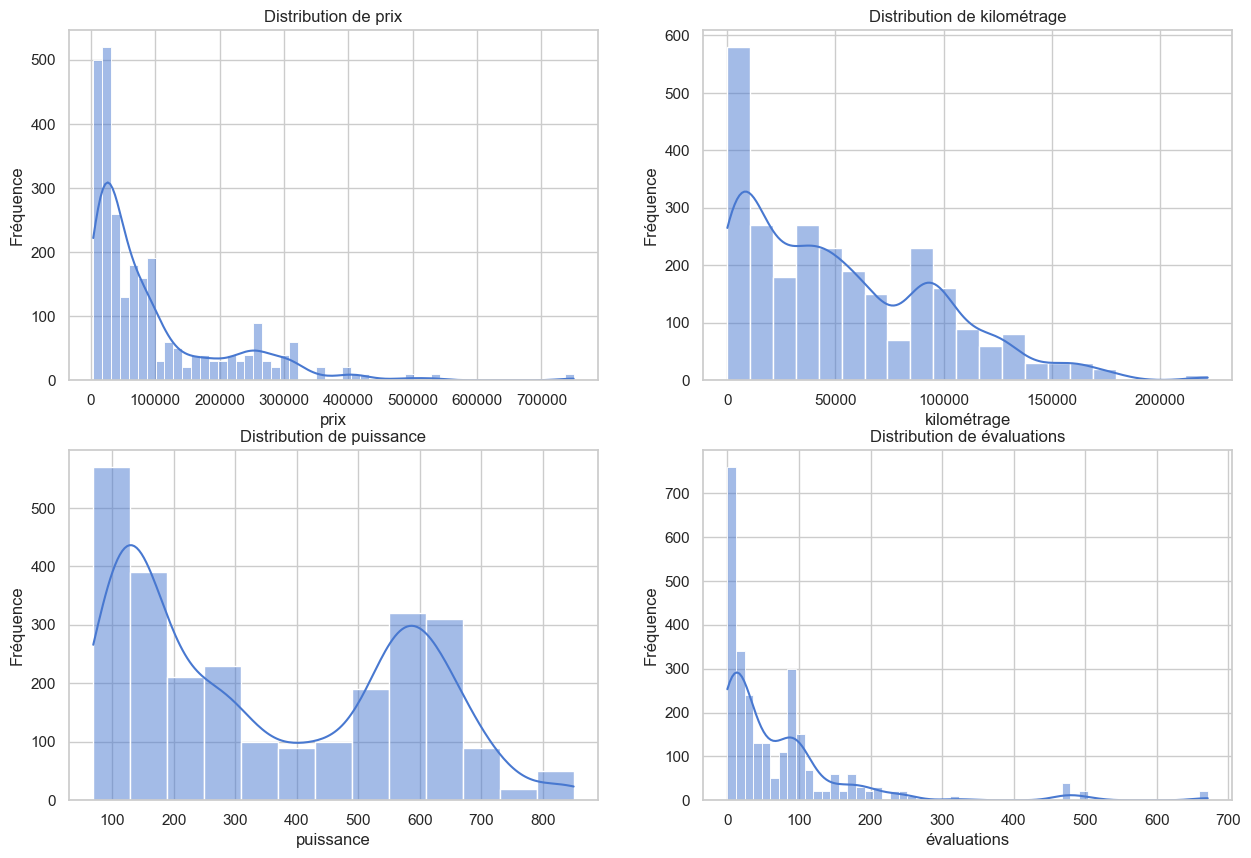

In [176]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, var in enumerate(var_num) :
    sns.histplot(df[var_num[i]], kde=True, ax=axes[i], palette='Muted')
    axes[i].set_title(f"Distribution de {var_num[i]}")
    axes[i].set_xlabel(var_num[i])
    axes[i].set_ylabel("Fréquence")


2. **Les variables catégorielles**

In [174]:
cat_var = df.select_dtypes(include=['object', 'bool']).columns.tolist()
#cat_var
print(f"Variables catégorielles : {cat_var}")

Variables catégorielles : ['modèle', 'transmission', 'carburant']


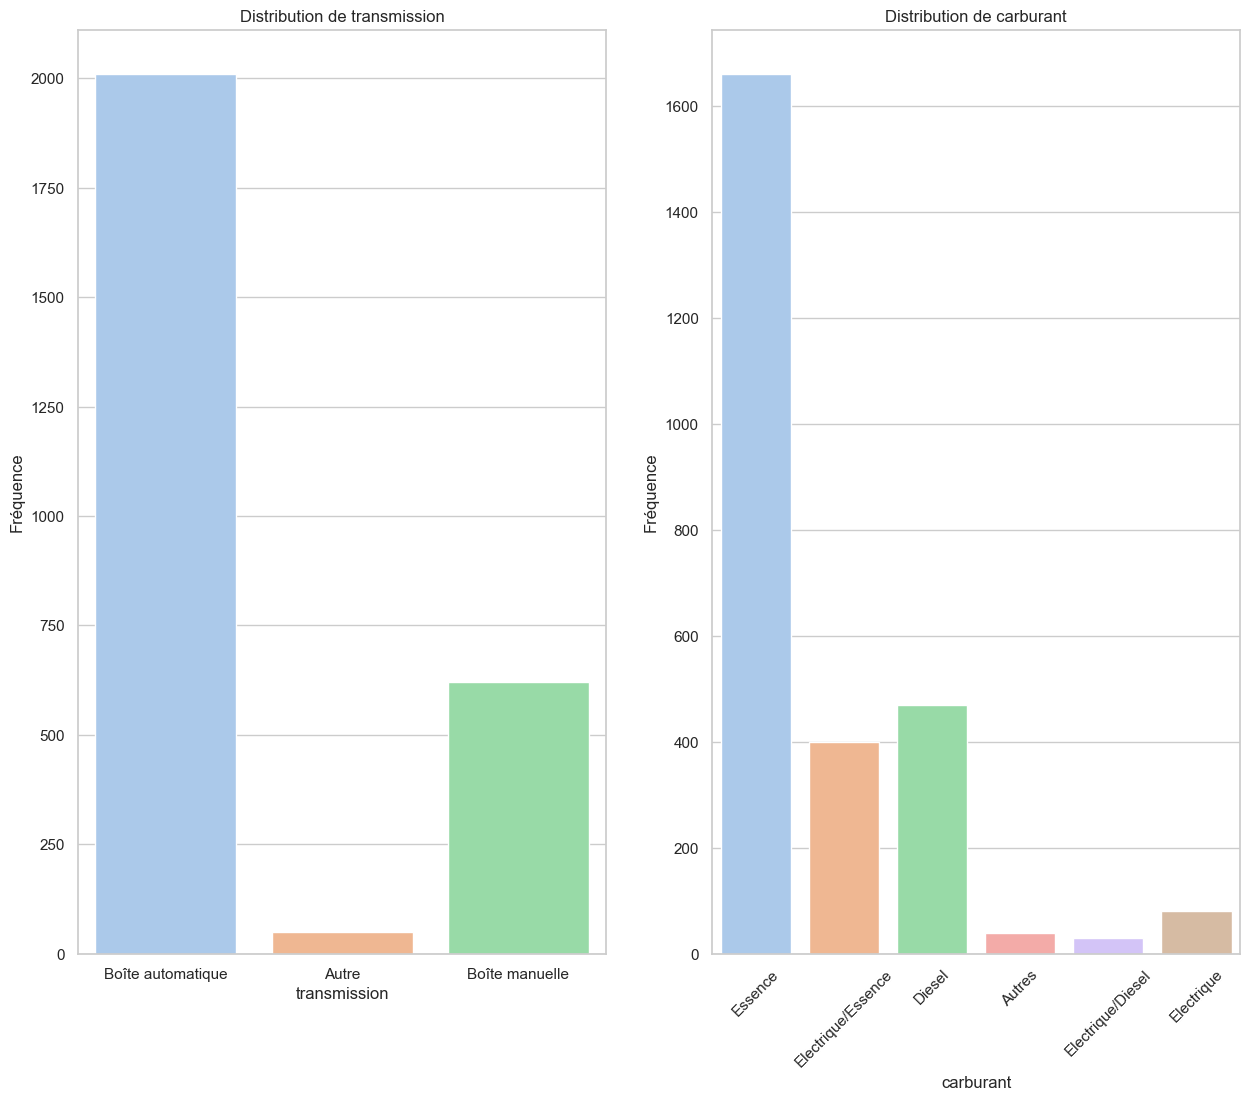

In [183]:
# viu=sualisation de la distribution des variables catégorielles
cat_var = ['transmission', 'carburant']

fig, axes = plt.subplots(1, 2, figsize=(15, 12))
axes = axes.flatten()
for i, var in enumerate(cat_var) :
    sns.countplot(data=df, x=var, ax=axes[i], palette='pastel')
    axes[i].set_title(f"Distribution de {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Fréquence")
    plt.xticks(rotation=45)

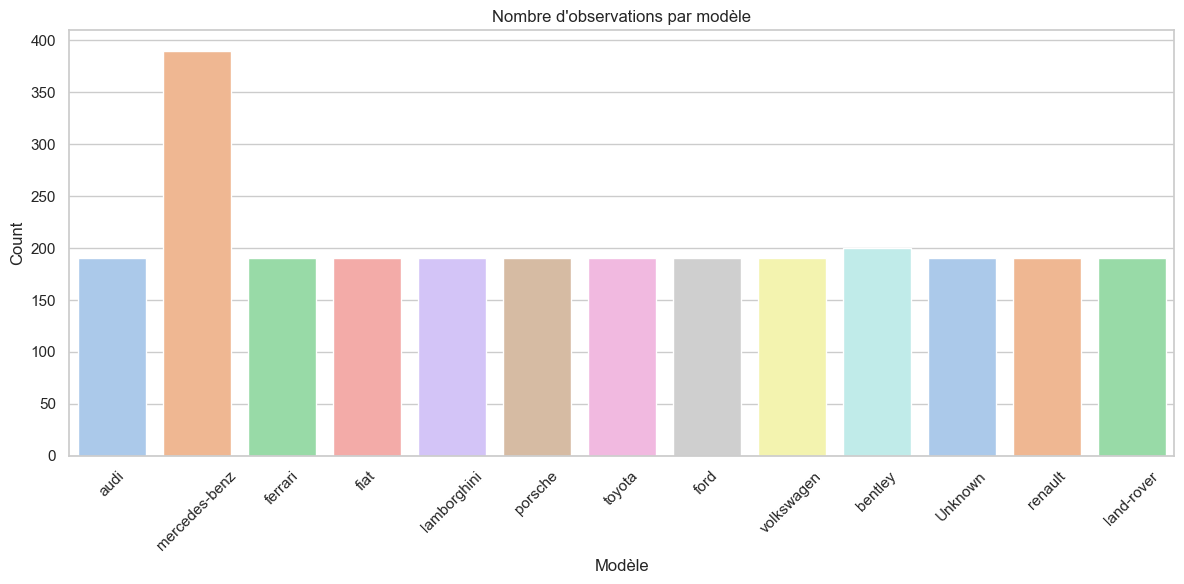

In [186]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='modèle', palette='pastel')
plt.xticks(rotation=45)
plt.title("Nombre d'observations par modèle")
plt.xlabel("Modèle")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## IV- Analyse bivariée/multivariée

In [ ]:
#df_encoded.to_csv(DATA_DIR / 'vehicules_encoded.csv', index=False)

In [190]:
df.groupby('modèle').mean(numeric_only=True)

,prix,kilométrage,puissance,évaluations
modèle,,,,
Unknown,33575.526316,55800.157895,237.736842,142.526316
audi,74764.105263,62942.789474,310.157895,78.210526
bentley,156540.300000,56087.550000,571.700000,92.800000
ferrari,255327.789474,25811.210526,650.210526,39.789474
fiat,13574.894737,45679.368421,97.368421,49.684211
ford,19837.421053,68453.684211,144.473684,57.842105
lamborghini,257148.894737,29149.473684,614.578947,57.473684
land-rover,64639.473684,61495.315789,263.578947,63.315789
mercedes-benz,137876.897436,64555.923077,590.051282,73.692308


In [189]:
df.groupby('modèle').median(numeric_only=True)

,prix,kilométrage,puissance,évaluations
modèle,,,,
Unknown,31995.0,35289.0,231.0,55.0
audi,67990.0,51054.0,286.0,75.0
bentley,133450.0,35814.0,551.0,8.0
ferrari,235000.0,10500.0,669.0,17.0
fiat,12900.0,41787.0,95.0,12.0
ford,17900.0,58099.0,150.0,30.0
lamborghini,265000.0,25160.0,639.0,31.0
land-rover,44900.0,53476.0,200.0,41.0
mercedes-benz,94950.0,63000.0,585.0,19.0


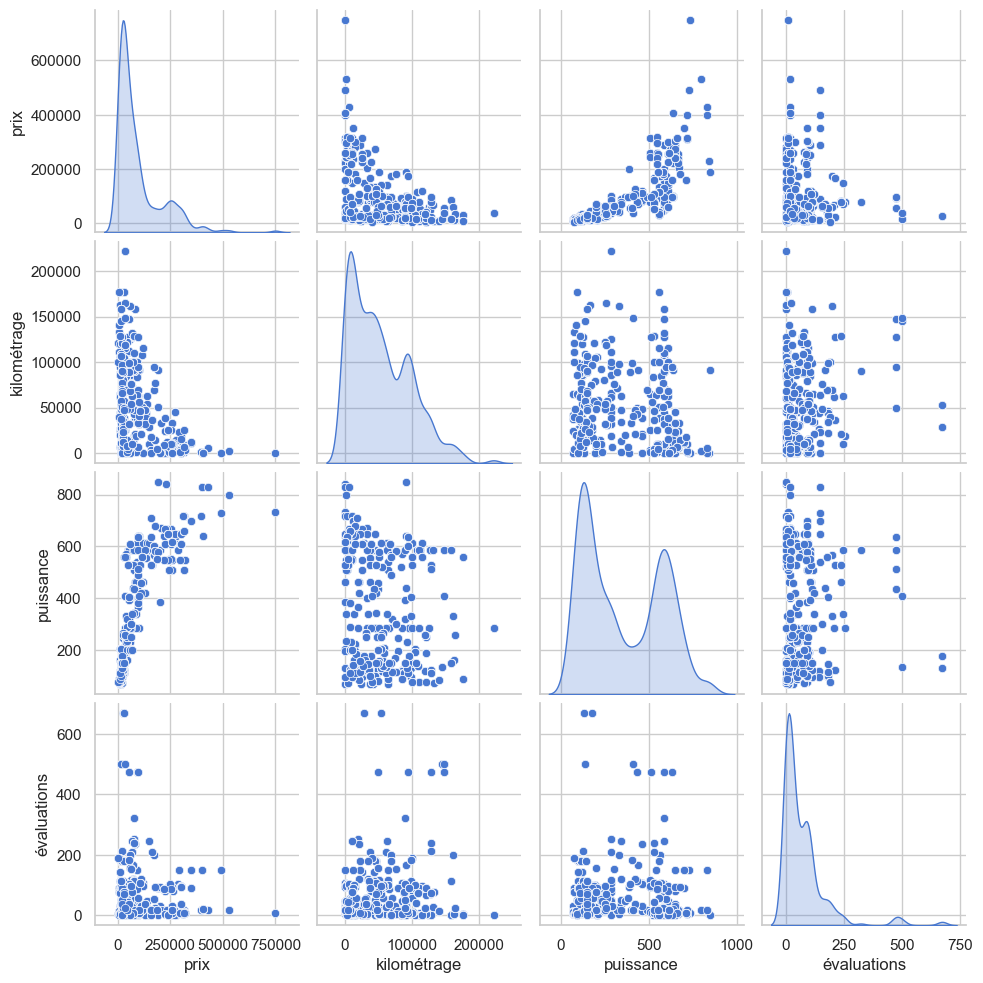

In [177]:
sns.pairplot( df.select_dtypes(include=['float', 'int']), diag_kind='kde',  palette= 'deep')

var num vs transmission 

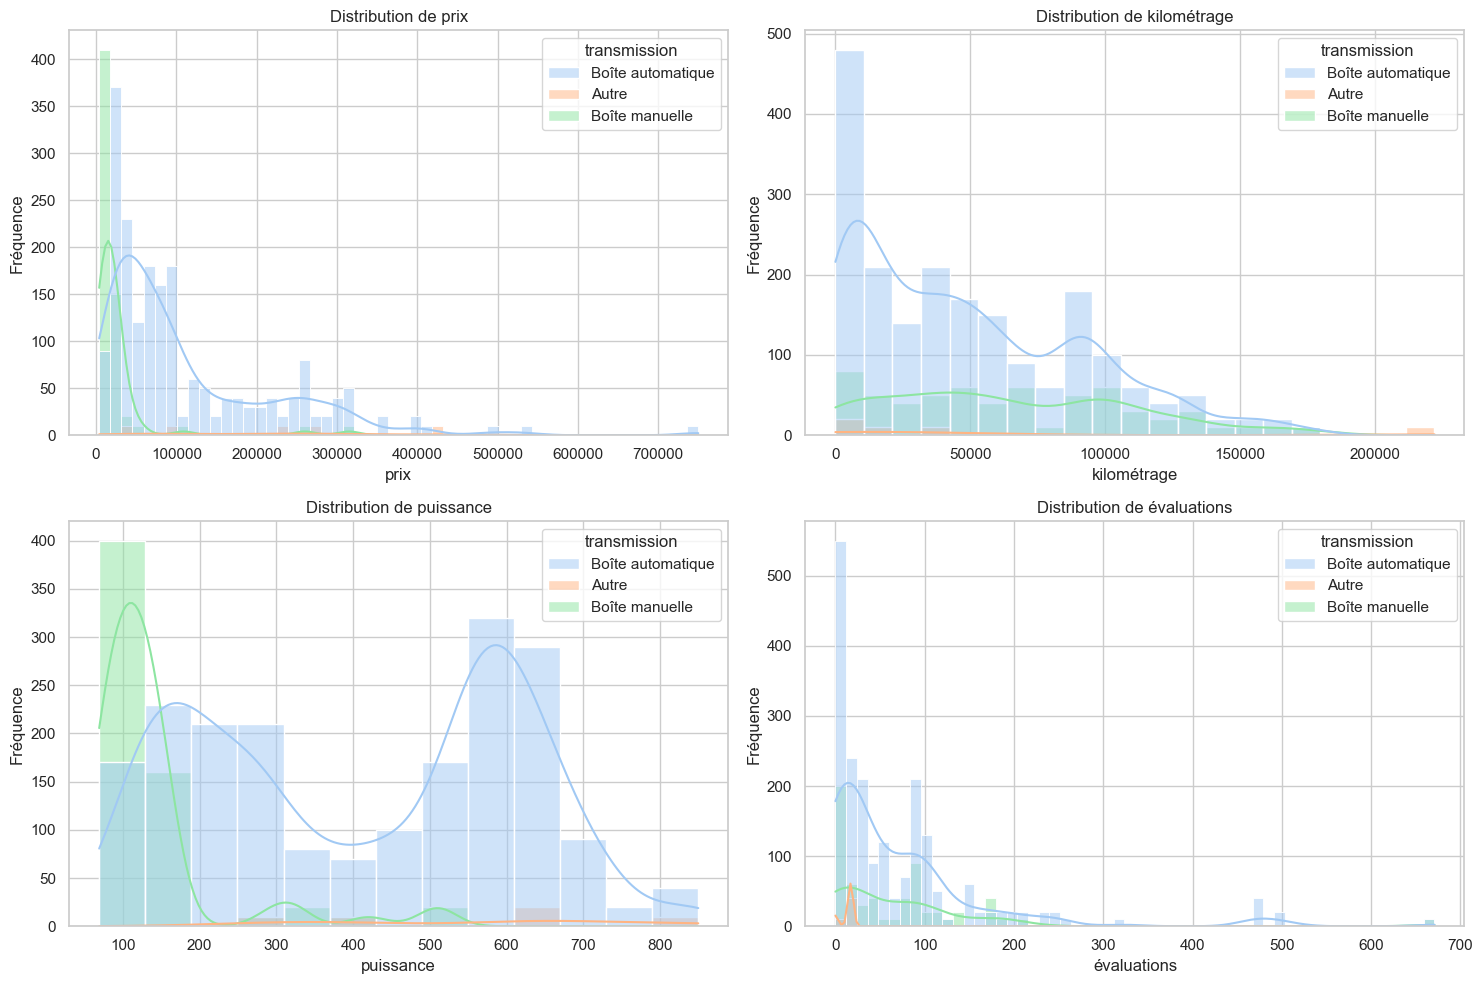

In [187]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(var_num):
    sns.histplot(data=df, x=var, kde=True, hue='transmission', ax=axes[i], palette=palette)
    axes[i].set_title(f"Distribution de {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Fréquence")

# Cacher les axes restants s'il y en a plus que nécessaire
for j in range(len(var_num), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

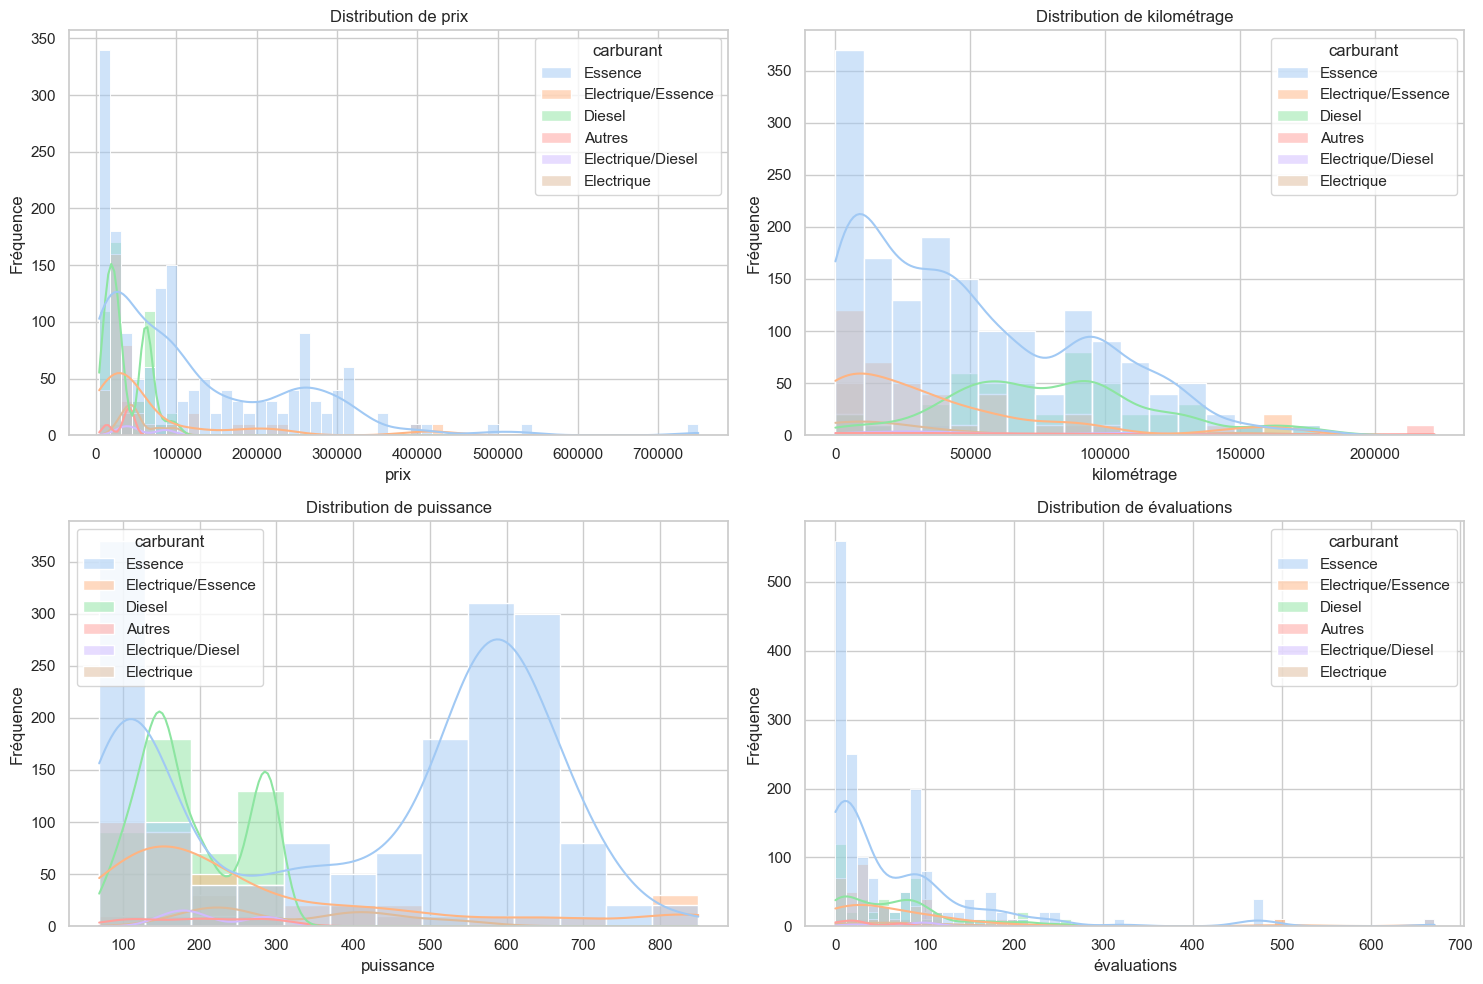

In [191]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(var_num):
    sns.histplot(data=df, x=var, kde=True, hue='carburant', ax=axes[i], palette=palette)
    axes[i].set_title(f"Distribution de {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Fréquence")

# Cacher les axes restants s'il y en a plus que nécessaire
for j in range(len(var_num), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

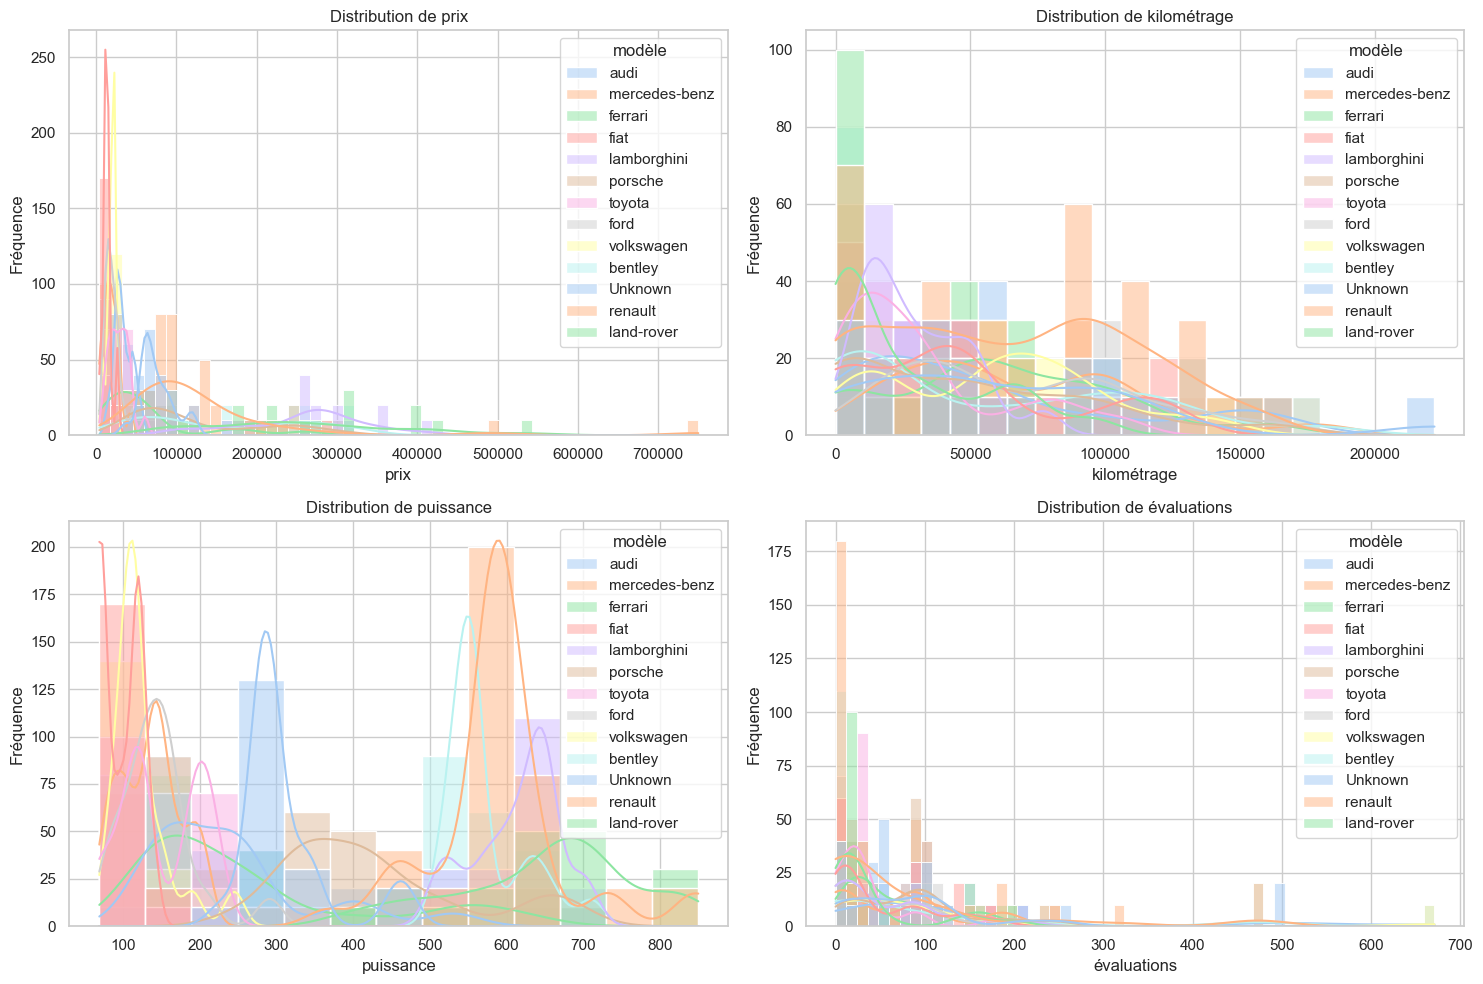

In [192]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(var_num):
    sns.histplot(data=df, x=var, kde=True, hue='modèle', ax=axes[i], palette=palette)
    axes[i].set_title(f"Distribution de {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Fréquence")

# Cacher les axes restants s'il y en a plus que nécessaire
for j in range(len(var_num), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: xlabel='carburant', ylabel='transmission'>

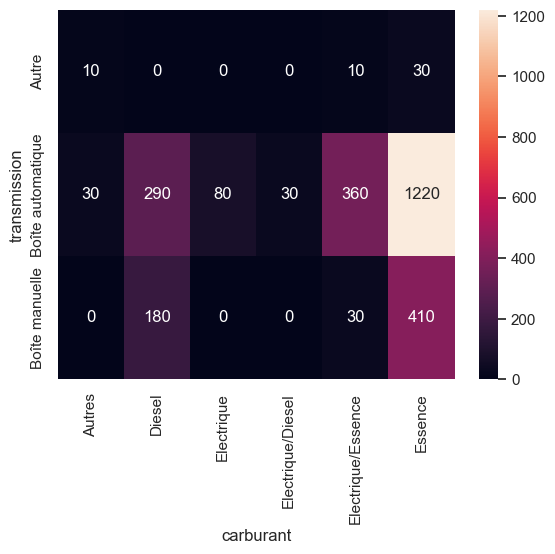

In [193]:
tab = pd.crosstab(df['transmission'], df['carburant'])
sns.heatmap(tab, annot=True, fmt="d")


In [201]:
df.isnull().sum().to_frame().T

,modèle,prix,transmission,kilométrage,carburant,puissance,évaluations
0,0,0,0,0,0,0,0
